In [5]:
# 1. Setup and Data Preparation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Set style for better looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Load the data
df = pd.read_csv('../data/cleaned_combined_survey.csv', sep=';')
print('Data loaded successfully!')
print(f'Dataset shape: {df.shape}')
print('\nFirst few rows:\n')
print(df.head())

Data loaded successfully!
Dataset shape: (77, 5)

First few rows:

   patient_id   age  anxiety_score  social_media_time age_group
0         1.0  23.0            6.0                4.0     Adult
1         2.0  30.0            3.0                2.0     Adult
2         3.0  19.0            6.0                4.0     Young
3         4.0  21.0            3.0                3.0     Adult
4         5.0  22.0            7.0                4.0     Adult


=== CORRELATION HEATMAP ===


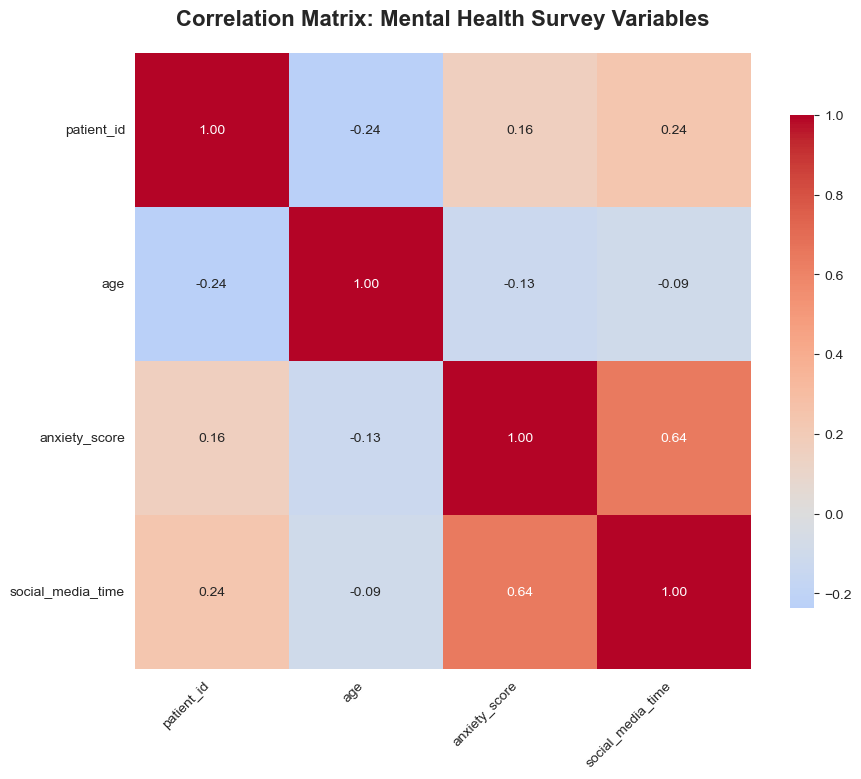

In [7]:
# 2. Correlation Heatmap

# We create a color-coded matrix that shows how all variables 
# in our dataset correlate with each other.
# This helps identify which factors are most strongly 
# related to anxiety scores.

print('=== CORRELATION HEATMAP ===')

# Calculate correlations between numerical variables
correlation_matrix = df.corr(numeric_only=True)

# Create the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix,
                      annot=True,      # Show correlation values
                      cmap='coolwarm', # Blue-red color scheme
                      center=0,        # Center at 0 (no correlation)
                      square=True,     # Squere cells
                      fmt='.2f',       # Format numbers to 2 decimals
                      cbar_kws={'shrink': 0.8})     # Color bar size

plt.title('Correlation Matrix: Mental Health Survey Variables',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Save the plot
plt.savefig('../plots/correlation_heatmap.png',
            dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()

=== COMBINED PLOT 1: SCATTER WITH AGE GROUPS ===


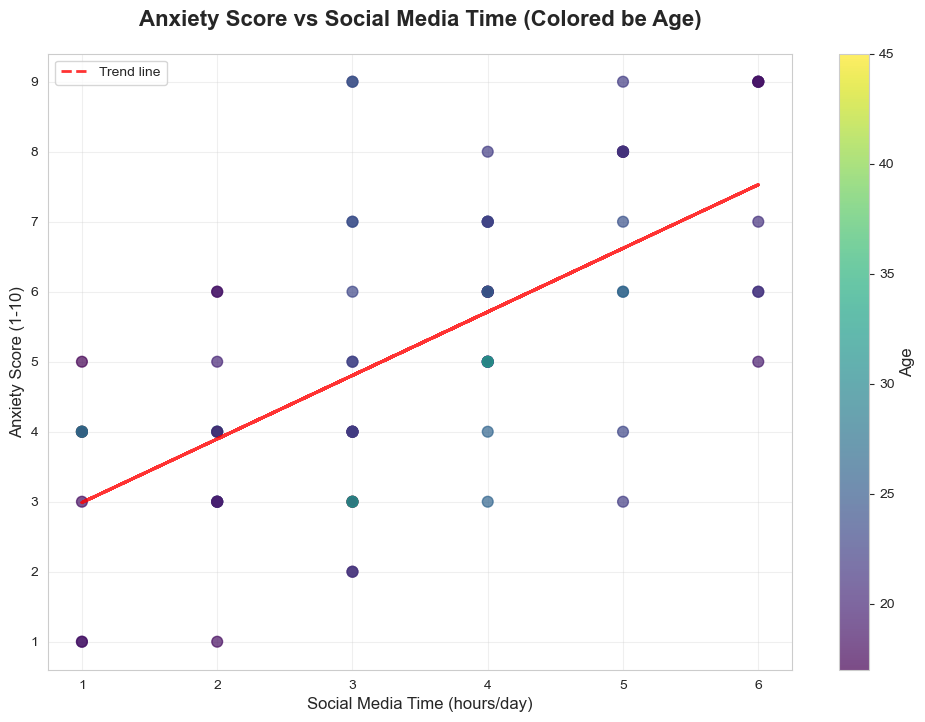

In [9]:
# 3. Combined Plot 1: Scatter Plot with Age Groups

# We are creating a scatter plot that shows three variables:
# social media time (x), anxiety score (y), and age group (color).
# This reveals how the relationship between social media and anxiety 
# differs across age groups.

print('=== COMBINED PLOT 1: SCATTER WITH AGE GROUPS ===')

plt.figure(figsize=(12, 8))

# Crate scatter plot colored by age group
scatter = plt.scatter(df['social_media_time'],
                        df['anxiety_score'],
                        c = df['age'],
                        cmap='viridis',
                        alpha=0.7,
                        s=60) # Point size

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Age', fontsize=12)

# Customization
plt.title('Anxiety Score vs Social Media Time (Colored be Age)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Social Media Time (hours/day)', fontsize=12)
plt.ylabel('Anxiety Score (1-10)', fontsize=12)
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['social_media_time'], df['anxiety_score'], 1)
p = np.poly1d(z)
plt.plot(df['social_media_time'], p(df['social_media_time']),
         "r--", alpha=0.8, linewidth=2, label='Trend line')

plt.legend()

# Save
plt.savefig('../plots/scatter_age_groups.png',
            dpi=300, bbox_inches='tight')
plt.show()

=== COMBINED PLOT 2: FACET GRID ===


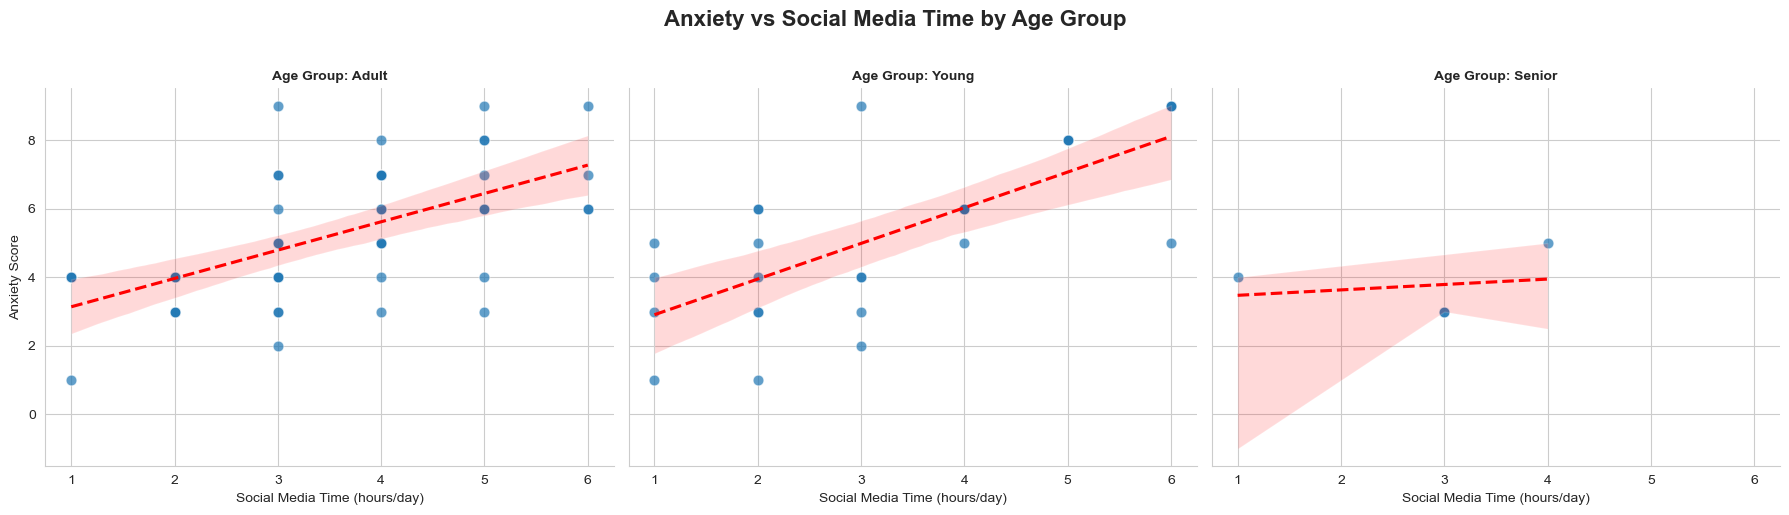

In [11]:
# 4. Combined Plot 2: Facet Grid by Age Categories

# We are creating multiple small scatter plots arranged be age categories.
# This allows us to see the social media anxiety relationship
# separetely for each age group.

print('=== COMBINED PLOT 2: FACET GRID ===')

# Create age categories if not already present
# Create facet grid

g = sns.FacetGrid(df, col='age_group', height=5, aspect=1.2)
g.map_dataframe(sns.scatterplot, x='social_media_time',
                y='anxiety_score', alpha=0.7, s=60)
g.map_dataframe(sns.regplot, x='social_media_time', y='anxiety_score',
                scatter=False, color='red', line_kws={'linestyle': '--'})

# Customize each subplot
g.set_titles('Age Group: {col_name}', fontweight='bold')
g.set_axis_labels('Social Media Time (hours/day)', 'Anxiety Score')
g.fig.suptitle('Anxiety vs Social Media Time by Age Group',
               fontsize=16, fontweight='bold', y=1.02)

# Adjust Layout
plt.tight_layout()

# Save
plt.savefig('../plots/facet_grid_age_groups.png',
            dpi=300, bbox_inches='tight')
plt.show()

=== COMBINED PLOT 3: BOX PLOT + SWARM PLOT ===


C:\Users\arsla\AppData\Local\Temp\ipykernel_11404\3650481749.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='age_group', y='anxiety_score',


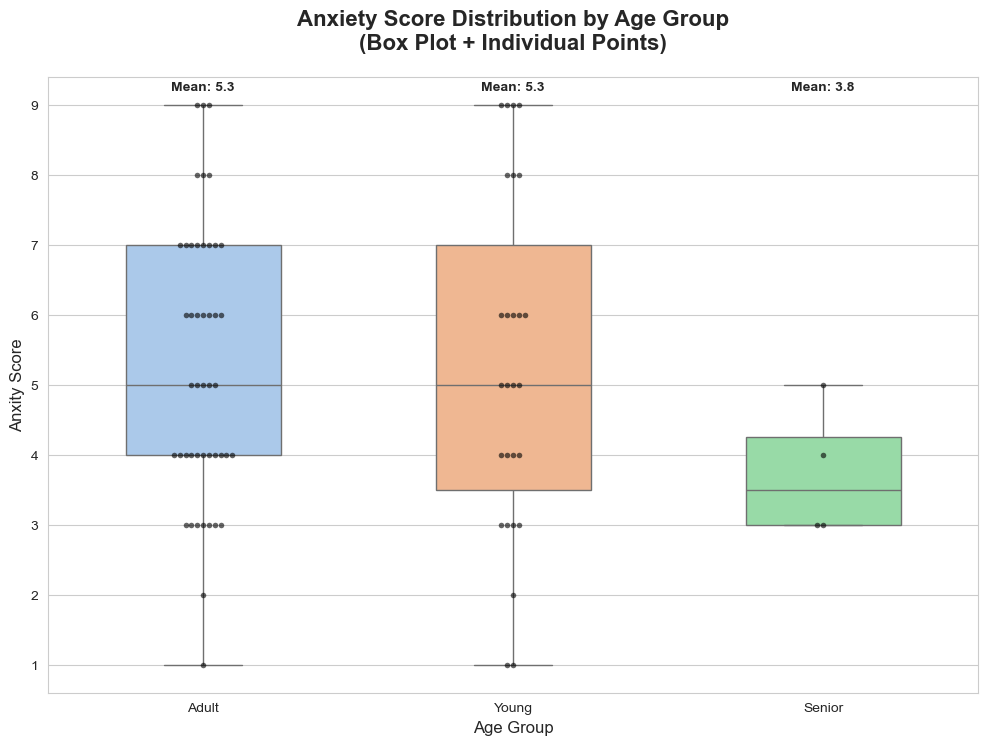

In [14]:
# 5. Combined Plot 3: Box Plot + Swarm Plot Combination

# We are combining box plots (show distributions) with swarm plots (to show individual data points).
# This provides both statisticall summary and individual data visibility.

print('=== COMBINED PLOT 3: BOX PLOT + SWARM PLOT ===')

plt.figure(figsize=(12, 8))

# Create box plot
sns.boxplot(data=df, x='age_group', y='anxiety_score',
            palette='pastel', width=0.5)

# Overlay swarm plot
sns.swarmplot(data=df, x='age_group', y='anxiety_score',
              color='black', alpha=0.6, size=4)

# Customization
plt.title('Anxiety Score Distribution by Age Group\n(Box Plot + Individual Points)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Anxity Score', fontsize=12)

# Add some statistics to the plot
for i, group in enumerate(df['age_group'].unique()):
    group_data = df[df['age_group'] == group]['anxiety_score']
    mean_val = group_data.mean()
    plt.text(i, plt.ylim()[1] - 0.2, f'Mean: {mean_val:.1f}',
    ha='center', fontweight='bold', fontsize=10)

plt.savefig('../plots/box_swarm_combination.png',
            dpi=300, bbox_inches='tight')
plt.show()

=== PUBLICATION-READY CUSTOMIZED PLOT ===


C:\Users\arsla\AppData\Local\Temp\ipykernel_11404\3693180211.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='age_group', y='anxiety_score',


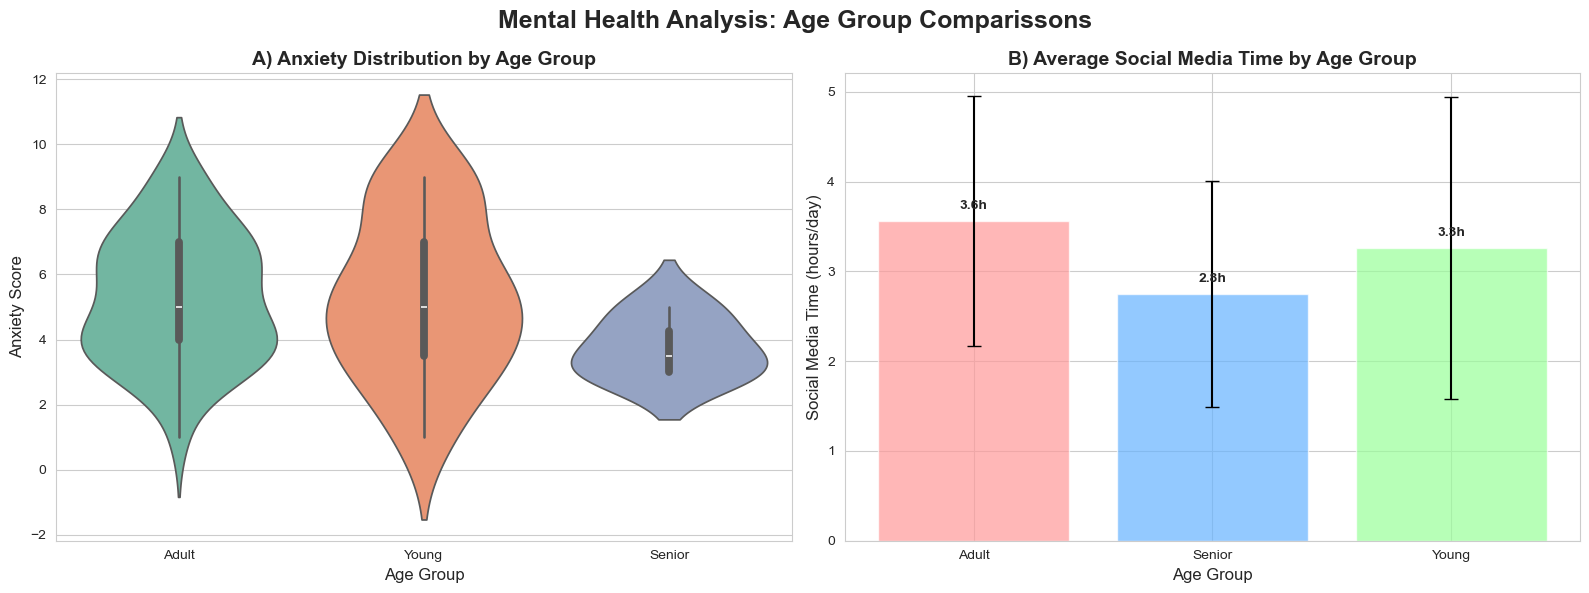

In [17]:
# 6. Advanced Customization: Publication-Ready Plot

# We are creating a highly customized, publication-ready visualization. 
# This is a professional formatting for research papers and presentations.

print('=== PUBLICATION-READY CUSTOMIZED PLOT ===')

# Create figure with specific size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Violin plot
sns.violinplot(data=df, x='age_group', y='anxiety_score',
               palette='Set2', ax=ax1)
ax1.set_title('A) Anxiety Distribution by Age Group',
              fontsize=14, fontweight='bold')
ax1.set_xlabel('Age Group', fontsize=12)
ax1.set_ylabel('Anxiety Score', fontsize=12)

#Plot 2: Bar plot with error bars
age_group_means = df.groupby('age_group')['social_media_time'].mean()
age_group_stds = df.groupby('age_group')['social_media_time'].std()

bars = ax2.bar(age_group_means.index, age_group_means.values,
               yerr=age_group_stds.values, capsize=5,
               color=['#ff9999', '#66b3ff', '#99ff99'], alpha=0.7)
ax2.set_title('B) Average Social Media Time by Age Group',
              fontsize=14, fontweight='bold')
ax2.set_xlabel('Age Group', fontsize=12)
ax2.set_ylabel('Social Media Time (hours/day)', fontsize=12)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{height:.1f}h', ha='center', va='bottom', fontweight='bold')

# Overall title
plt.suptitle('Mental Health Analysis: Age Group Comparissons',
             fontsize=18, fontweight='bold', y=0.98)

# Adjust Layout
plt.tight_layout()

# Save
plt.savefig('../plots/publication_ready_analysis.png',
            dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()